In [18]:
import os
import sys
# import itertools
# import dill

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from importlib import reload
# import scipy.special
#import scipy.signal
# import scipy.optimize
# import scipy.linalg
# import scipy.stats

from scipy.integrate import quad
import scipy.optimize as opt
import figure_plotting_methods as fpm

reload(fpm)


%matplotlib inline

font = {'family' : 'serif',
        'size'   : 16}
text = {'usetex' : True}

plt.rc('font', **font)
plt.rc('text',**text)
plt.rc('axes', titlesize=18)

In [15]:
# incomplete moments

def F_m(y,m):
    def gauss_fun(x):
        return ((x-y)**m)*np.exp(-(x**2)/2)/np.sqrt(2*np.pi)
    int_res = quad(gauss_fun, y, np.inf)
    return int_res[0]

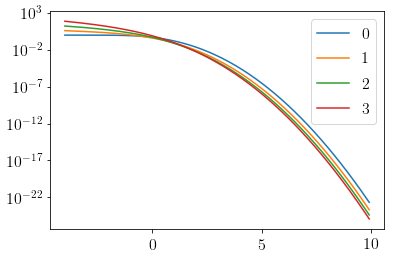

In [83]:
# test
test_y = np.arange(-4,10,0.1)
ms = [0,1,2,3]

plt.figure()
for m in ms:
    test_F = np.array([F_m(y,m) for y in test_y])
    plt.plot(test_y,test_F,label="{}".format(m))
plt.legend()
plt.yscale('log')

In [126]:
# optimization problem setup

def gen_fun(sig_b,var_s,ups):
    val_1 = (F_m(ups,1)**2)*sig_b**2-F_m(ups,2)
    val_2 = F_m(ups,0)*sig_b**2/(sig_b**2+var_s)-F_m(ups,2)
    return val_1,val_2

var_s_hat = 1.

def opt_fun(x):
    # first input is sig_b, second is ups
    fun_vals = np.zeros(2)
    fun_vals[0], fun_vals[1] = gen_fun(x[0],var_s_hat,x[1])
    return fun_vals

In [127]:
# plot optimization functions

var_s_hat = 1000.
sig_bs = np.logspace(0,1.5,12)
upss = np.logspace(0,1.0,10)

eq_1_vals = np.zeros((len(sig_bs),len(upss)))
eq_2_vals = np.zeros((len(sig_bs),len(upss)))

for i,sig_b in enumerate(var_bs):
    for j, ups in enumerate(upss):
        x = np.array([sig_b,ups])
        x_out = opt_fun(x)
        eq_1_vals[i,j] = x_out[0]
        eq_2_vals[i,j] = x_out[1]

Text(0,0.5,'$\\sigma_{\\xi}$')

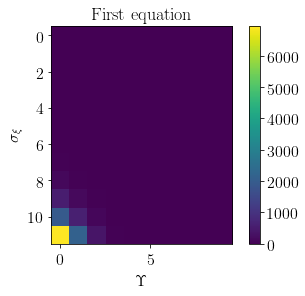

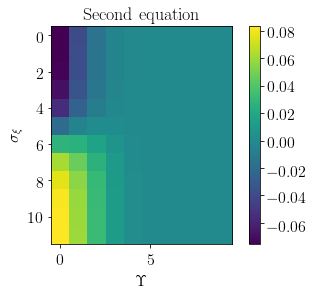

In [128]:
plt.figure()
plt.imshow(eq_1_vals)
plt.colorbar()
plt.title('First equation')
plt.xlabel(r'$\Upsilon$')
plt.ylabel(r'$\sigma_{\xi}$')

plt.figure()
plt.imshow(eq_2_vals)
plt.colorbar()
plt.title('Second equation')
plt.xlabel(r'$\Upsilon$')
plt.ylabel(r'$\sigma_{\xi}$')

In [147]:
# solve optimization problem to get surviving fraction

var_s_hats = np.logspace(-2,3.5,20)
frac_surv = np.zeros(len(var_s_hats))
ups_star = np.zeros(len(var_s_hats))

for i,var_s_hat in enumerate(var_s_hats):
    # guess using theoretical solution
    ups_theor = np.sqrt(2*np.log(max(var_s_hat,2.)))
    var_b_theor = max(2*var_s_hat/ups_theor**2,1.)
    #init_vec = np.array([var_b_theor,ups_theor]) # var_b, ups init
    init_vec = np.array([1.,0.0])
    
    sol_vec = opt.newton_krylov(opt_fun,init_vec)
    #sol_vec = opt.broyden1(opt_fun,init_vec)
    ups = sol_vec[1]
    ups_star[i] = ups
    frac_surv[i] = F_m(ups,0)
    print(i,sol_vec[0]**2,ups)
    

0 3.152986797051837 0.003969536732682042
1 3.163751120124646 0.007694123082129436
2 3.184586705276003 0.01485069248992183
3 3.224782878395888 0.028428663403978014
4 3.3016546706339818 0.05361236224999662
5 3.4465441505520076 0.09850256644342101
6 506.11101284708417 4.600945112396572
7 4.190386309378278 0.2882305459986838
8 5.014098963000578 0.44529332406558125
9 6.397066091361859 0.6383175582443981
10 8.680538300144853 0.8551115843622794
11 12.434106720132805 1.08346272592308
12 18.630476357031835 1.3143236828524472
13 28.95245355597004 1.5421257677000426
14 46.335625838026715 1.7638877960879313
15 75.95280116931427 1.9781345298202857
16 126.89465466652766 2.1846902043666065
17 215.47156534810122 2.3832785599622546
18 371.01707119403954 2.573904109687275
19 3376117.1618724014 40.233000107136085


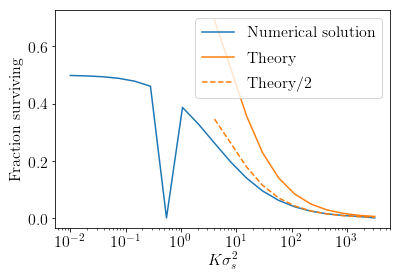

In [148]:
plt.figure()
plt.plot(var_s_hats,frac_surv,label="Numerical solution")

# first index > 1
one_idx = 0
while var_s_hats[one_idx]<3. and one_idx<len(var_s_hats):
    one_idx += 1

plt.plot(var_s_hats[one_idx:],2*np.log(var_s_hats[one_idx:])/var_s_hats[one_idx:],label='Theory')
plt.plot(var_s_hats[one_idx:],np.log(var_s_hats[one_idx:])/var_s_hats[one_idx:],label='Theory/$2$',color="C1",
        ls='--')
plt.xscale('log')
plt.xlabel('$K\sigma_{s}^2$')
plt.ylabel('Fraction surviving')
plt.legend()

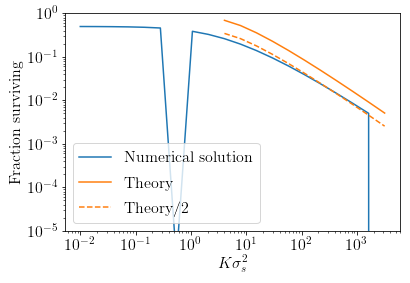

In [149]:
plt.figure()
plt.plot(var_s_hats,frac_surv,label="Numerical solution")

# first index > 1
one_idx = 0
while var_s_hats[one_idx]<3. and one_idx<len(var_s_hats):
    one_idx += 1

plt.plot(var_s_hats[one_idx:],2*np.log(var_s_hats[one_idx:])/var_s_hats[one_idx:],label='Theory')
plt.plot(var_s_hats[one_idx:],np.log(var_s_hats[one_idx:])/var_s_hats[one_idx:],label='Theory/$2$',color="C1",
        ls='--')
plt.xscale('log')
plt.yscale('log')
plt.ylim((1e-5,1))
plt.xlabel('$K\sigma_{s}^2$')
plt.ylabel('Fraction surviving')
plt.legend()

Text(0.5,0,'$\\sigma_s^2$')

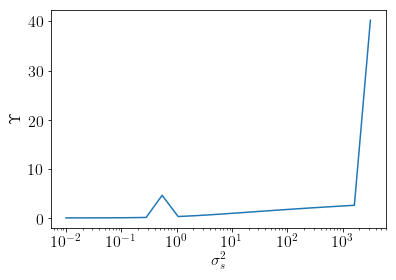

In [157]:
plt.figure()
plt.plot(var_s_hats,ups_star)
plt.xscale('log')
plt.ylabel(r'$\Upsilon$')
plt.xlabel(r'$\sigma_s^2$')

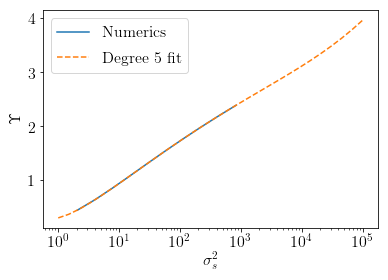

In [178]:
start_idx = 8
end_idx = -2

xs = np.log(var_s_hats[start_idx:end_idx])
ys = ups_star[start_idx:end_idx]
deg = 5

coeffs = np.polyfit(xs,ys**2,deg=deg) # fit squared upsilons with log

def ups_fit(var_s):
    ups_star = 0.
    for d,coeff in enumerate(coeffs[::-1]):
        ups_star += coeff*np.log(var_s)**d
    return np.sqrt(ups_star)

plt.figure()
plt.plot(np.exp(xs),ys,label='Numerics')

x_hats = np.logspace(0,5,30)
y_hats = np.array([ups_fit(x_hat) for x_hat in x_hats])

plt.plot(x_hats,y_hats,label='Degree ${}$ fit'.format(deg),ls='--')
plt.xlabel(r'$\sigma_s^2$')
plt.ylabel(r'$\Upsilon$')

plt.legend()
plt.xscale('log')

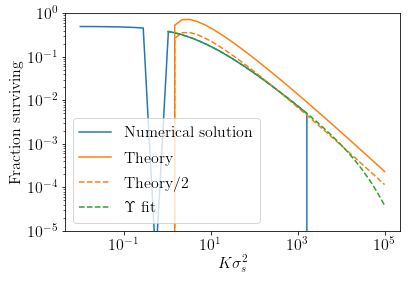

In [179]:
# fraction surviving with fit

surv_hats = np.array([F_m(ups,0) for ups in y_hats])

plt.plot(var_s_hats,frac_surv,label="Numerical solution")

# first index > 1
one_idx = 0
while var_s_hats[one_idx]<3. and one_idx<len(var_s_hats):
    one_idx += 1

plt.plot(x_hats,2*np.log(x_hats)/x_hats,label='Theory')
plt.plot(x_hats,np.log(x_hats)/x_hats,label='Theory/$2$',color="C1",
        ls='--')
plt.plot(x_hats,surv_hats,label=r'$\Upsilon$ fit',ls='--')
plt.xscale('log')
plt.yscale('log')
plt.ylim((1e-5,1))
plt.xlabel('$K\sigma_{s}^2$')
plt.ylabel('Fraction surviving')
plt.legend()



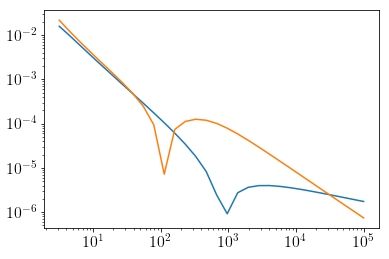

In [170]:
# plot values of optimization function for theoretical predictions

var_s_theor = np.logspace(0.5,5,30)
ups_theor = np.sqrt(2*np.log(var_s_theor))
var_b_theor = 2*var_s_theor/ups_theor**2

eq_1_vals = np.array([np.abs(opt_fun([var_b,ups])[0]) for var_b,ups in zip(var_b_theor,ups_theor)])
eq_2_vals = np.array([np.abs(opt_fun([var_b,ups])[1]) for var_b,ups in zip(var_b_theor,ups_theor)])

plt.figure()
plt.plot(var_s_theor,eq_1_vals)
plt.plot(var_s_theor,eq_2_vals)

plt.xscale('log')
plt.yscale('log')

In [ ]:
# same, but for values giving half types surviving

# plot values of optimization function for theoretical predictions

var_s_theor = np.logspace(0.5,5,30)
ups_theor = np.sqrt(2*np.log(var_s_theor))
var_b_theor = 2*var_s_theor/ups_theor**2

eq_1_vals = np.array([np.abs(opt_fun([var_b,ups])[0]) for var_b,ups in zip(var_b_theor,ups_theor)])
eq_2_vals = np.array([np.abs(opt_fun([var_b,ups])[1]) for var_b,ups in zip(var_b_theor,ups_theor)])

plt.figure()
plt.plot(var_s_theor,eq_1_vals)
plt.plot(var_s_theor,eq_2_vals)

plt.xscale('log')
plt.yscale('log')